In [ ]:

import kagglehub
taweilo_loan_approval_classification_data_path = kagglehub.dataset_download('taweilo/loan-approval-classification-data')

print('Data source import complete.')


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/kaggle/input/loan-approval-classification-data/loan_data.csv")

In [ ]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
data.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [ ]:
data["person_gender"] = (data["person_gender"] == "male").astype(int)
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,1,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
print(data[data.isnull().any(axis=1)])
print(data.isnull().values.any())

Empty DataFrame
Columns: [person_age, person_gender, person_education, person_income, person_emp_exp, person_home_ownership, loan_amnt, loan_intent, loan_int_rate, loan_percent_income, cb_person_cred_hist_length, credit_score, previous_loan_defaults_on_file, loan_status]
Index: []
False


<Axes: xlabel='loan_status'>

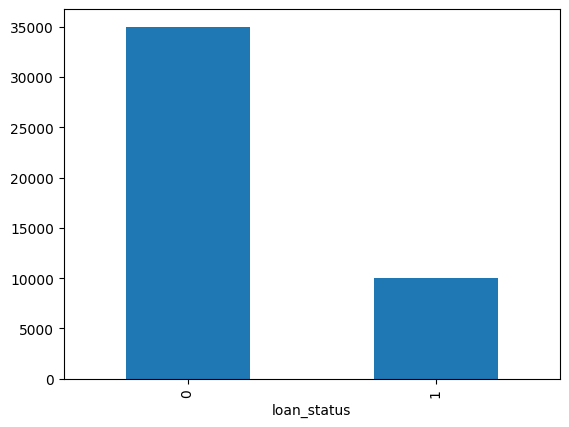

In [ ]:
data['loan_status'].value_counts().plot(kind = 'bar')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
categorical_cols = ['person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Splitting
X = data_encoded.drop(columns=['loan_status'])
y = data_encoded['loan_status']  # Target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9285555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.90      0.77      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000

Confusion Matrix:
 [[6811  179]
 [ 464 1546]]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf = confusion_matrix(y_test, y_pred)
print(conf)

[[6811  179]
 [ 464 1546]]


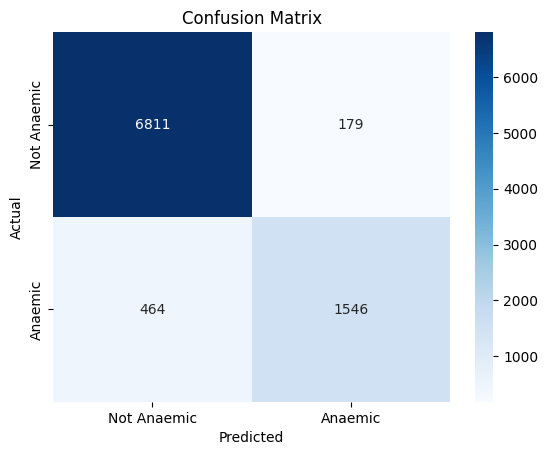

In [ ]:
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Anaemic', 'Anaemic'], yticklabels=['Not Anaemic', 'Anaemic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()